In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from mlxtend.classifier import StackingClassifier
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()
lr = LogisticRegression(random_state=42)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

In [4]:
sclf.fit(X_train, y_train)
y_pred = sclf.predict(X_test)
print('Stacking Accuracy:', accuracy_score(y_test, y_pred))

Stacking Accuracy: 1.0


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 加载iris数据集
iris = load_iris()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# 训练随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 预测测试集
y_pred = rf.predict(X_test)

# 计算准确率
accuracy = sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)


Accuracy: 1.0


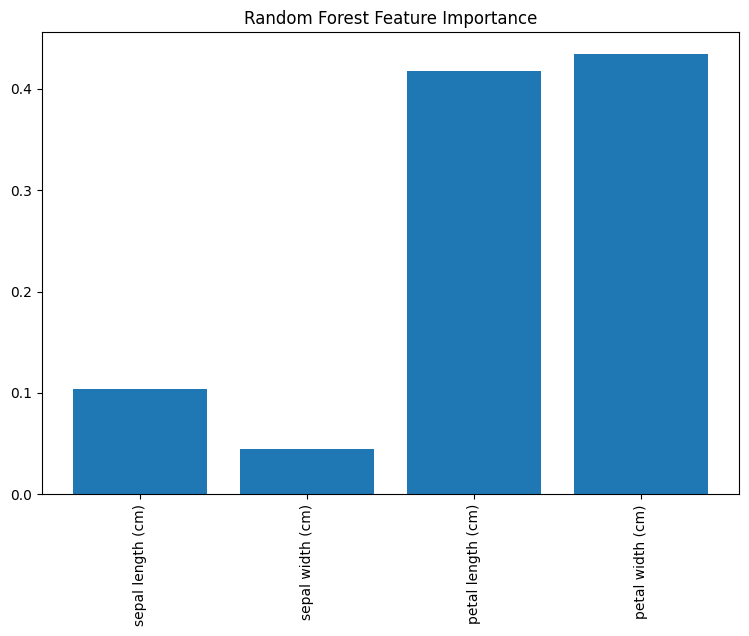

In [6]:
fig, ax = plt.subplots(figsize = (9,6), dpi=100)
ax.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
ax.set_xticks(range(len(rf.feature_importances_)))
ax.set_xticklabels(iris.feature_names, rotation=90)
ax.set_title('Random Forest Feature Importance')
plt.show()

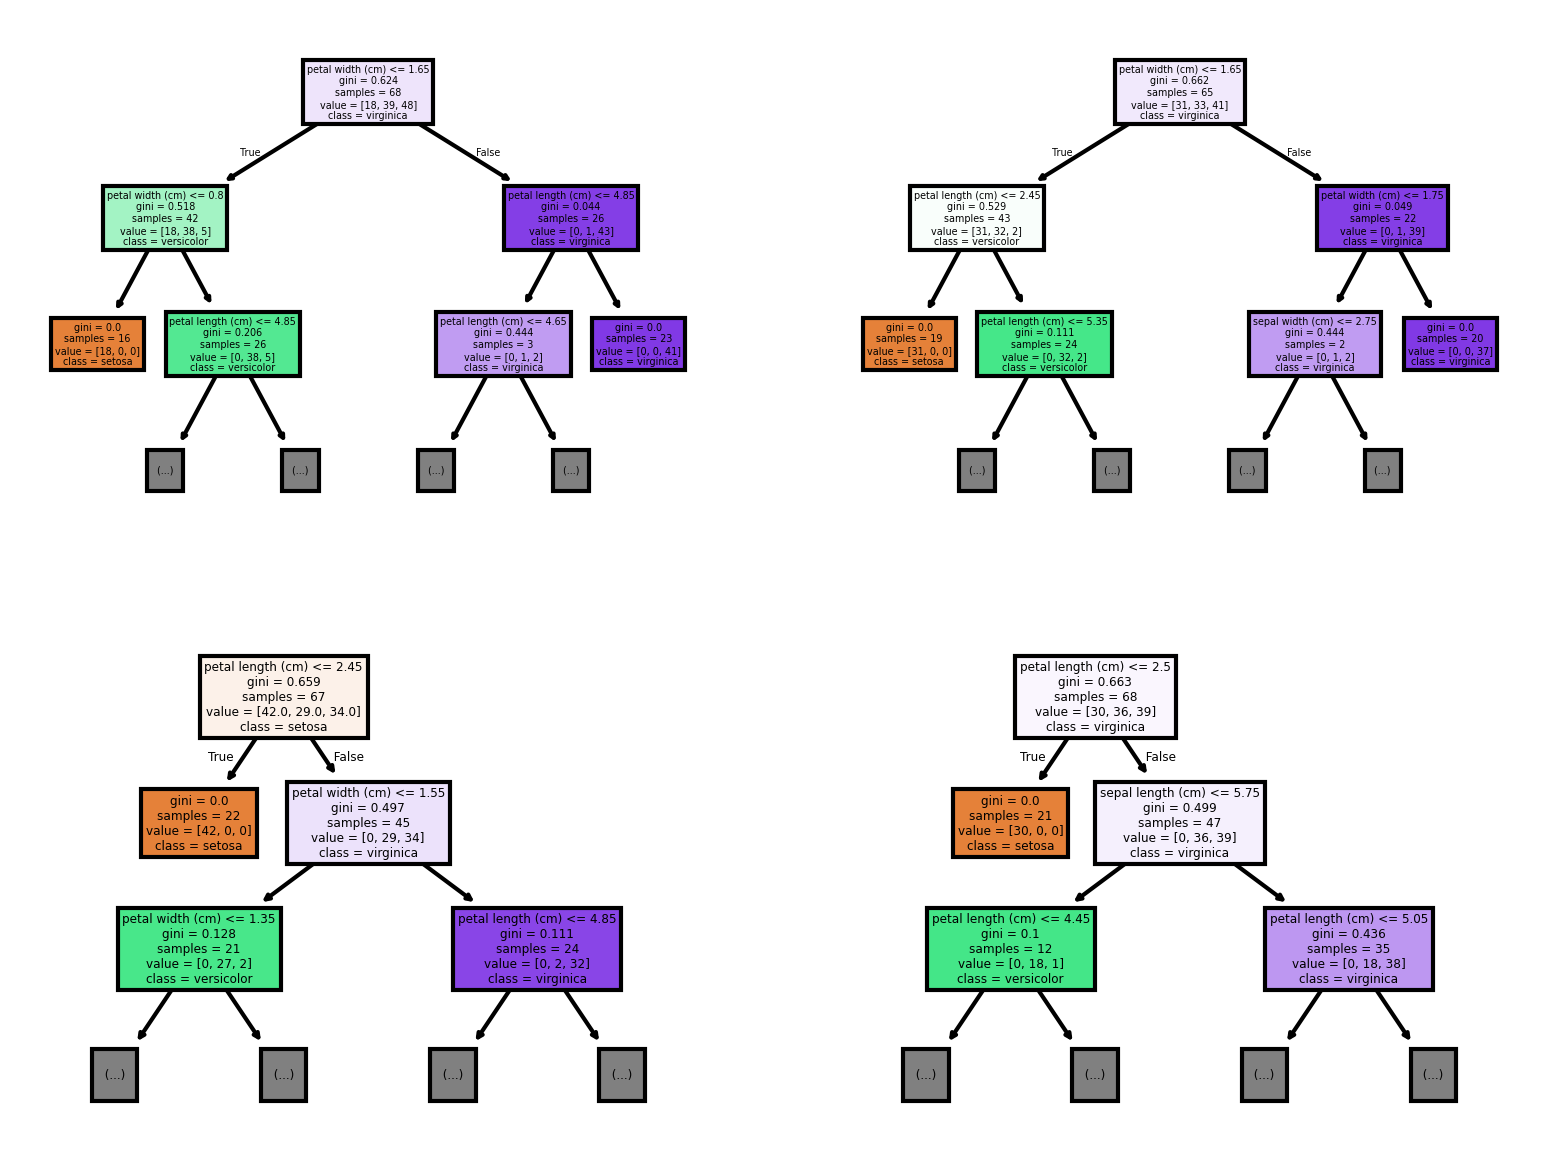

In [7]:
from sklearn.tree import plot_tree
plt.figure(dpi=300)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_tree(rf.estimators_[i], max_depth=2, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.savefig('figs/6-1.png', dpi=300)
plt.show()

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


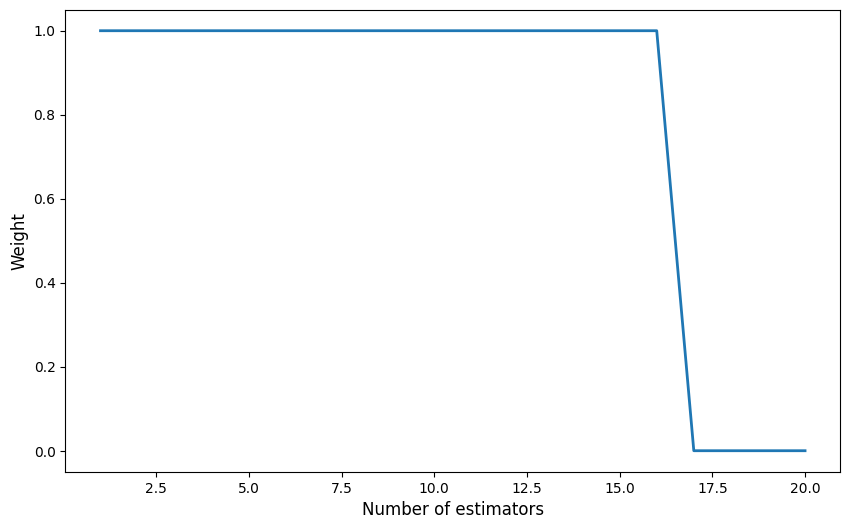

In [17]:
# 导入所需的库
import numpy as np                  # 用于数值计算
import matplotlib.pyplot as plt     # 用于数据可视化
from sklearn.datasets import make_moons  # 用于生成非线性可分的数据集
from sklearn.tree import DecisionTreeClassifier  # 决策树分类器
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost分类器

#make_moons 是 scikit-learn 库中的一个函数，它用于生成两个相互交织的半圆形数据集，通常用于测试聚类或分类算法。这个函数特别适合用来模拟非线性可分的数据分布情况。
# 使用make_moons生成一个包含500个样本的二维数据集，噪声水平为0.3，随机种子设为42
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# 初始化一个决策树分类器
# max_depth参数设置为9意味着树的最大深度为9层
# random_state设为42是为了保证结果的可重复性
tree_clf = DecisionTreeClassifier(max_depth=9, random_state=42)

# 初始化AdaBoost分类器
# 使用之前定义的决策树作为基分类器
# n_estimators参数表示使用的弱学习器的数量（即决策树的数量）
# algorithm参数指定使用的算法类型，"SAMME.R"是一种改进版本，适用于多类分类问题
# learning_rate参数控制每一步的贡献强度
# random_state设为42是为了保证结果的可重复性
ada_clf = AdaBoostClassifier(tree_clf, 
                             n_estimators=20, algorithm="SAMME.R", 
                             learning_rate=0.5, random_state=42)

# 使用训练数据拟合AdaBoost分类器
ada_clf.fit(X, y)

# 创建一个新的figure对象，设置其大小为10x6英寸，分辨率为100点/英寸
fig = plt.figure(figsize=(10, 6), dpi=100)

# 添加一个子图到figure中
ax = fig.add_subplot(111)

# 绘制每个弱分类器的权重随时间的变化情况
# x轴是从1到弱分类器数量的范围
# y轴是每个弱分类器的权重
ax.plot(range(1, len(ada_clf.estimator_weights_) + 1), ada_clf.estimator_weights_, linewidth=2)

# 设置x轴标签
ax.set_xlabel('Number of estimators', fontsize=12)

# 设置y轴标签
ax.set_ylabel('Weight', fontsize=12)

# 显示图表
plt.show()


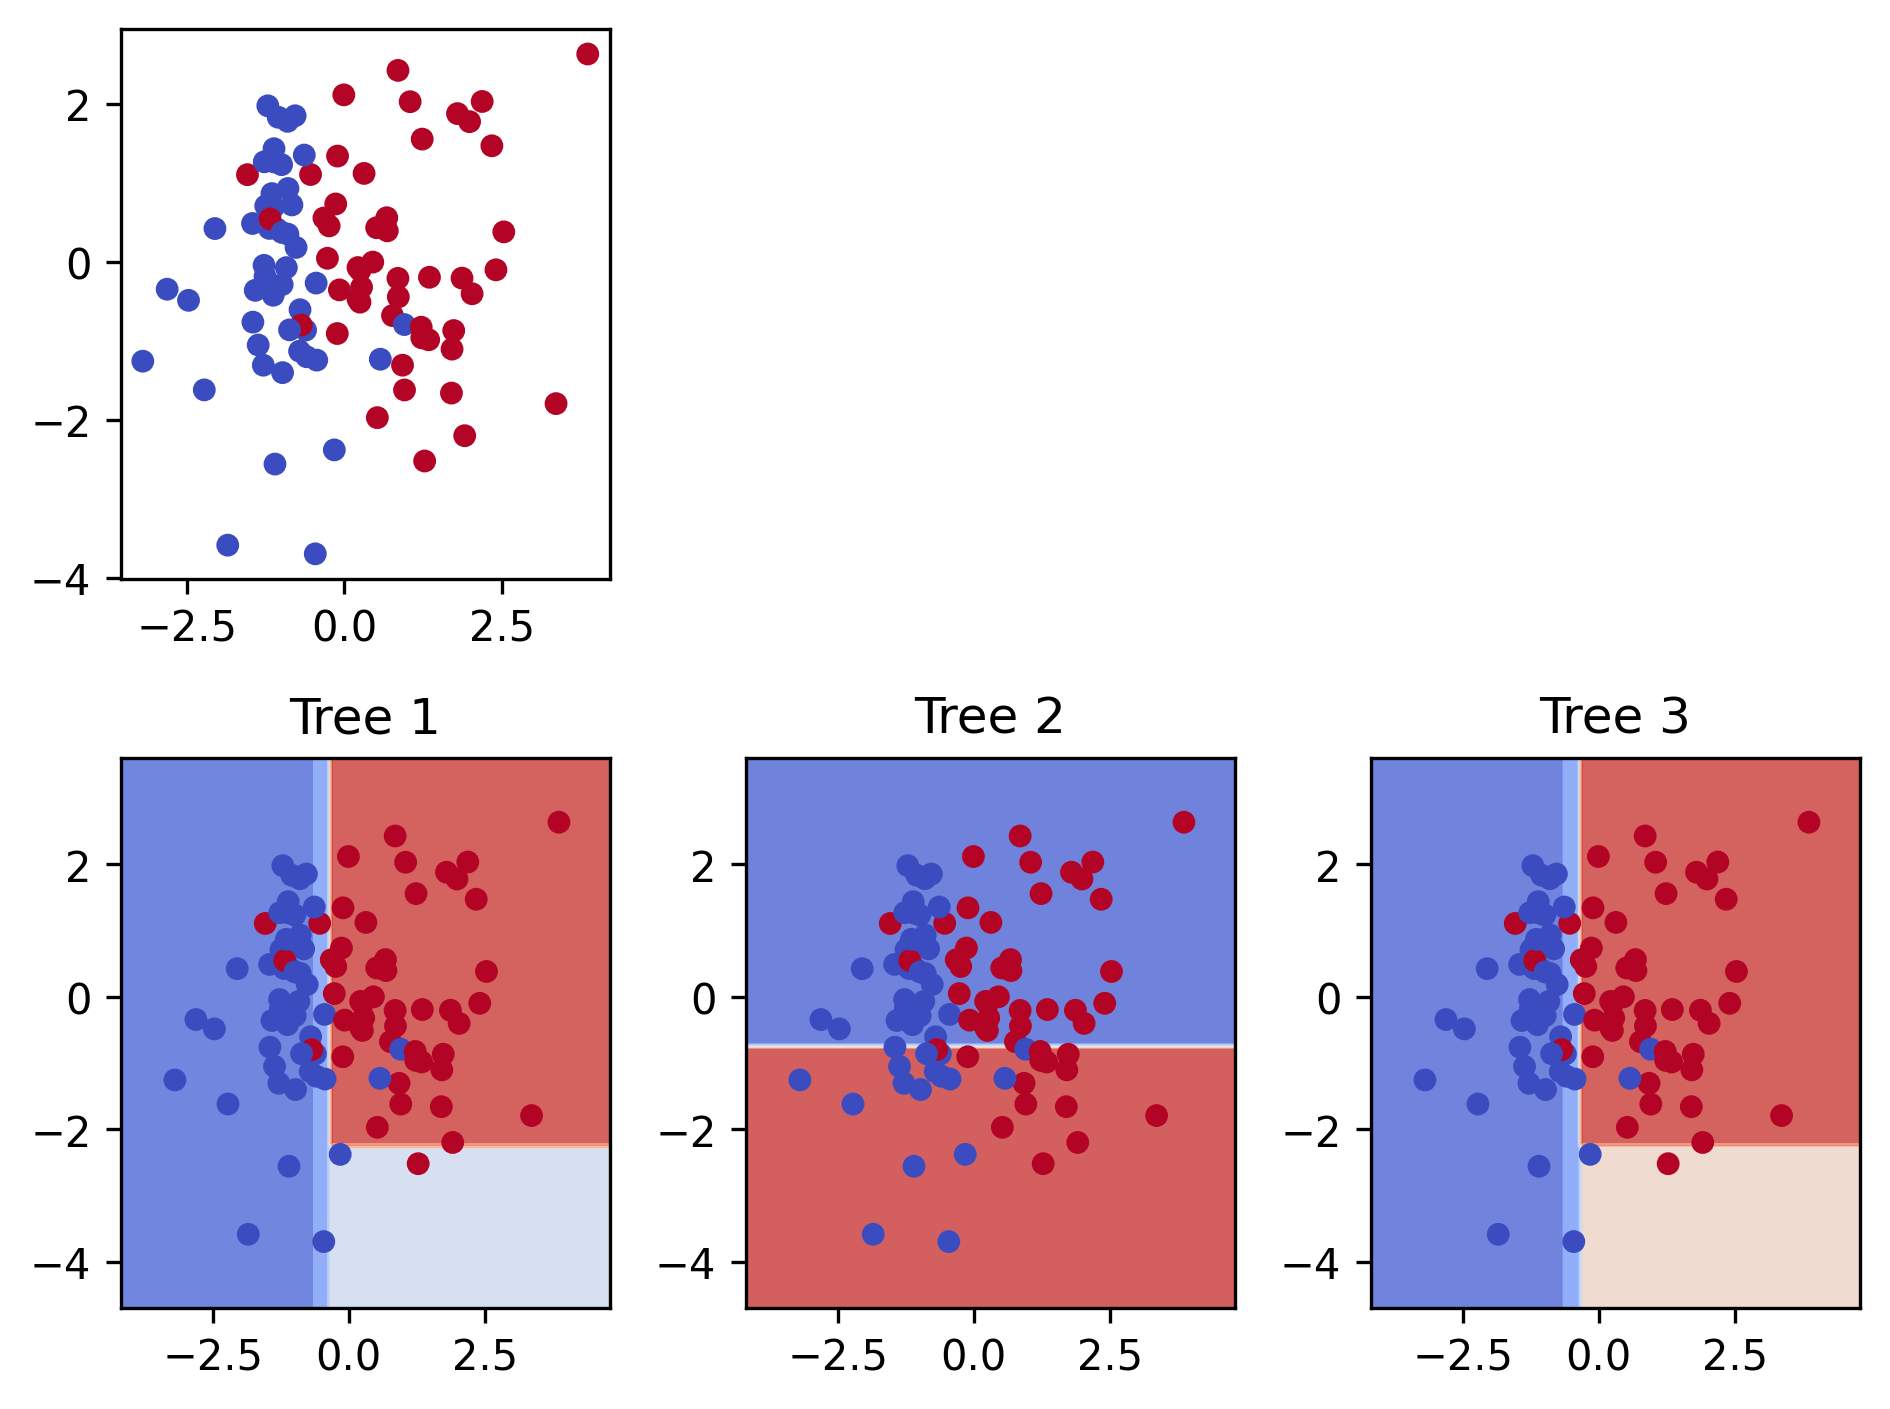

In [19]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification  # 用于生成模拟数据集
from sklearn.ensemble import GradientBoostingClassifier  # 梯度提升决策树分类器
from sklearn.tree import DecisionTreeClassifier  # 决策树分类器

# 创建一个二分类的数据集
# n_samples=100 表示我们想要100个样本
# n_features=2 表示特征空间有2维
# n_informative=2 表示所有特征都是信息性的
# n_redundant=0 表示没有冗余特征
# random_state=0 保证结果可复现
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0)

# 创建一个GBDT分类器
# n_estimators=3 表示我们会训练3棵弱学习器（决策树）
# learning_rate=1.0 是学习率，较大的值意味着每次迭代更新较强
# max_depth=2 表示每棵树的最大深度为2
gbdt = GradientBoostingClassifier(n_estimators=3, learning_rate=1.0, max_depth=2)

# 拟合模型到数据
gbdt.fit(X, y)

# 设置绘图的分辨率
plt.figure(dpi=300)

# 绘制初始数据集
plt.subplot(231)  # 2行3列的第一个子图
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)  # 散点图显示数据点

# 为了可视化决策边界，我们需要创建一个网格
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# 训练并可视化第一棵树
gbdt.fit(X, y)  # 重新拟合模型以获取单独的第一棵树
plt.subplot(234)  # 2行3列的第四个子图
plt.title('Tree 1')  # 图标题
Z = gbdt.estimators_[0][0].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # 预测网格上的类别
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  # 绘制等高线图
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)  # 显示数据点

# 训练并可视化第二棵树
gbdt.fit(X, y - gbdt.predict(X))  # 使用残差作为新标签
plt.subplot(235)  # 2行3列的第五个子图
plt.title('Tree 2')  # 图标题
Z = gbdt.estimators_[0][0].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # 预测网格上的类别
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  # 绘制等高线图
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)  # 显示数据点

# 训练并可视化第三棵树
gbdt.fit(X, y - gbdt.predict(X))  # 使用残差作为新标签
plt.subplot(236)  # 2行3列的第六个子图
plt.title('Tree 3')  # 图标题
Z = gbdt.estimators_[0][0].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # 预测网格上的类别
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  # 绘制等高线图
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)  # 显示数据点

# 调整子图布局
plt.tight_layout()

# 保存图形到文件
plt.savefig('figs/6-3.png', dpi=300)

# 显示图形
plt.show()


In [22]:
# 导入必要的库
import numpy as np          # numpy用于科学计算，比如生成随机数据
import xgboost as xgb       # xgboost是一个优化的分布式梯度增强库，旨在实现高效、灵活和便携
import matplotlib.pyplot as plt  # matplotlib用于数据可视化，这里未在代码中使用到

# 设定随机种子以保证实验可复现
np.random.seed(10)
# 生成一个形状为 (100, 10) 的随机数数组作为特征数据
X = np.random.rand(100, 10)
# 生成一个长度为 100 的整数数组作为标签数据，取值范围为 [0, 2)，即 0 或 1
y = np.random.randint(0, 2, size=100)

# 将 NumPy 数组转换为 XGBoost 的 DMatrix 对象，DMatrix 是 XGBoost 的基本数据结构
dtrain = xgb.DMatrix(X, label=y)

# 定义模型参数
param = {
    'max_depth': 2,     # 树的最大深度
    'eta': 1,           # 学习率，在每一步迭代中的权重更新步长
    'objective': 'binary:logistic'  # 目标函数，这里是二分类的逻辑回归任务
}

# 训练模型，指定迭代次数
num_round = 10  # 迭代轮数
# 使用 XGBoost 的 train 方法训练模型
bst = xgb.train(param, dtrain, num_round)

[0]	train-logloss:0.56231
[1]	train-logloss:0.48326
[2]	train-logloss:0.39037
[3]	train-logloss:0.33826
[4]	train-logloss:0.29715
[5]	train-logloss:0.26698
[6]	train-logloss:0.23666
[7]	train-logloss:0.21067
[8]	train-logloss:0.18271
[9]	train-logloss:0.16188


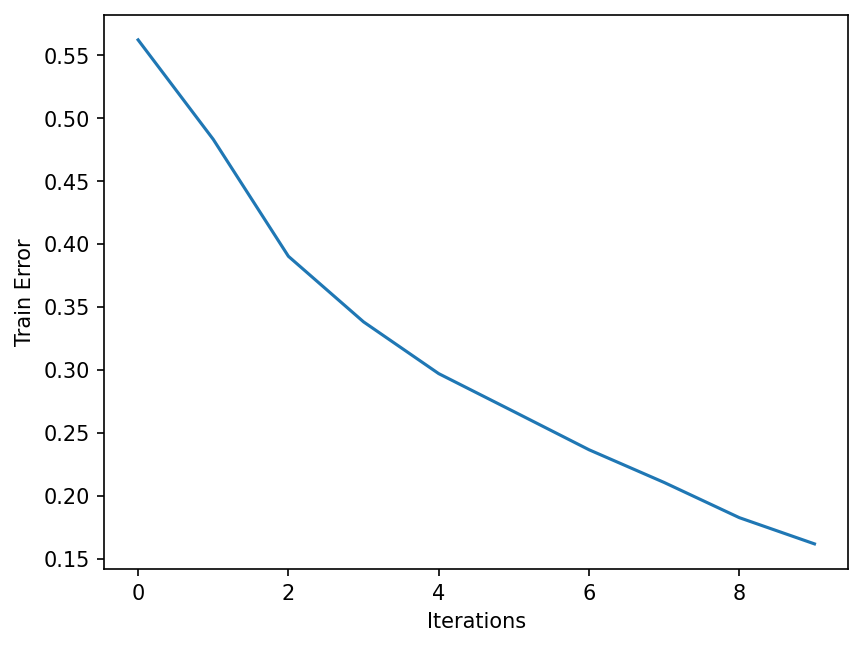

In [23]:
# 初始化一个空字典来存储评估结果
evals_result = {}

# 使用xgboost的train方法训练模型
# 添加额外的参数 evals 和 evals_result
# evals 参数是一个列表，包含元组，每个元组的第一个元素是要评估的数据集（这里是训练数据）
# 元组的第二个元素是给这个数据集起的名字，这里命名为 'train'
# evals_result 参数是一个字典，用于收集评估结果
bst = xgb.train(param, dtrain, num_round, evals=[(dtrain, 'train')], evals_result=evals_result)

# 从 evals_result 字典中获取训练集上的 logloss 值
train_metric = evals_result['train']['logloss']

# 创建一个新的图形，设置分辨率为150dpi
plt.figure(dpi=150)

# 绘制训练误差随迭代次数变化的趋势图
plt.plot(train_metric)

# 设置图表的x轴标签为“迭代次数”
plt.xlabel('Iterations')

# 设置图表的y轴标签为“训练误差”
plt.ylabel('Train Error')

# 显示图表
plt.show()

[LightGBM] [Info] Number of positive: 495, number of negative: 505
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495000 -> initscore=-0.020001
[LightGBM] [Info] Start training from score -0.020001


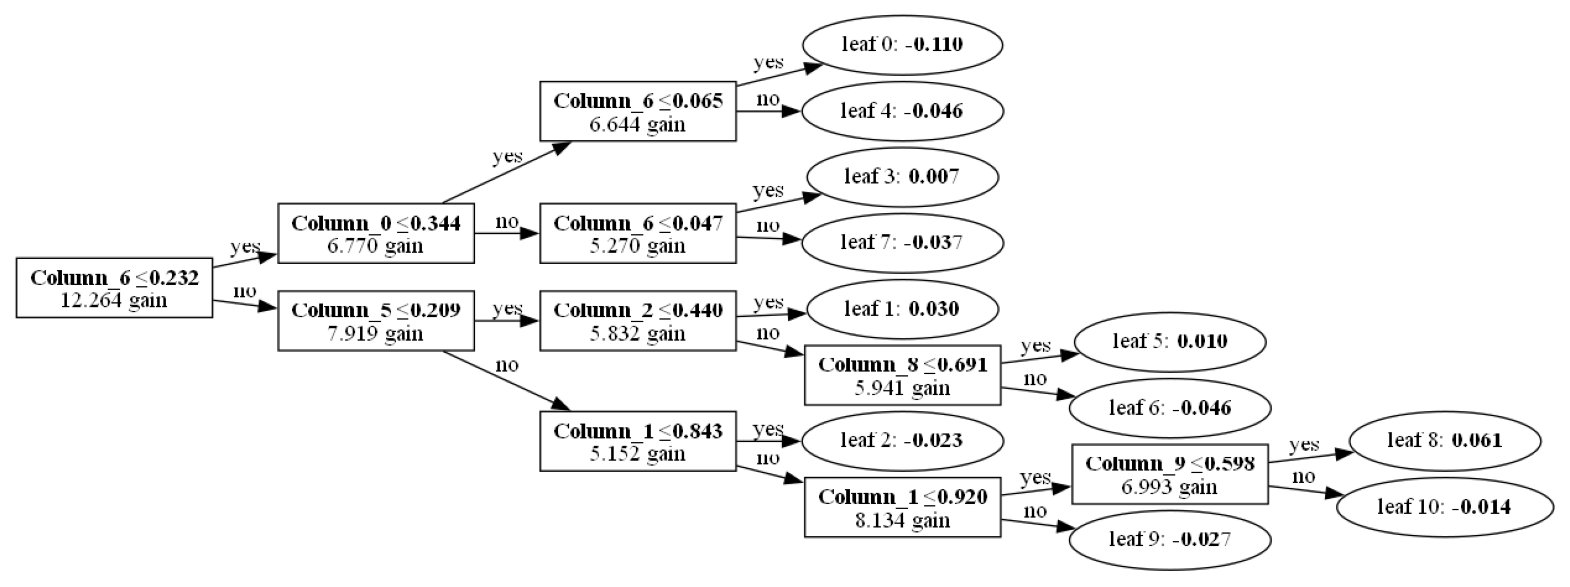

In [4]:
# 导入必要的库
import numpy as np          # numpy用于科学计算，比如生成随机数据
import lightgbm as lgb      # LightGBM是一个高效的梯度提升决策树框架
import matplotlib.pyplot as plt  # matplotlib用于数据可视化，这里主要用于展示树形图

# 生成一个形状为 (1000, 10) 的随机数组 X 作为特征数据
X = np.random.rand(1000, 10)
# 生成一个长度为 1000 的随机整数数组 y 作为标签数据，值为0或1
y = np.random.randint(0, 2, size=1000)

# 定义模型参数
params = {
    'boosting_type': 'gbdt',       # 使用传统的梯度提升决策树
    'objective': 'binary',         # 目标函数为二分类问题
    'metric': {'binary_logloss'},  # 使用二分类的对数损失作为评估指标
    'num_leaves': 11,              # 每棵树的最大叶子节点数量
    'learning_rate': 0.05,         # 学习率，控制每次迭代更新权重的程度
    'feature_fraction': 0.9,       # 在每轮训练时使用的特征比例，用于防止过拟合
}

# 将特征数据和标签数据组合成 LightGBM 可以使用的 Dataset 对象
train_data = lgb.Dataset(X, label=y)

# 训练模型，指定参数、数据集以及迭代次数（树的数量）
gbm = lgb.train(params,
                train_data,
                num_boost_round=10)  # 这里构建了10棵树

# 绘制模型中的第一棵树（索引为0），设置图形大小为 (20, 10)，并显示分割信息
ax = lgb.plot_tree(gbm, tree_index=0, figsize=(20,10), show_info=['split_gain'])

# 显示绘制的树形图
plt.show()